# shAI Training 2023 | Level 1
## Music Genre Classification (Final Project)
## SHAI C5/G3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


artist: Name of the Artist.

song: Name of the Track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

duration in milliseconds :Time of the song

time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

Class: Genre of the track.

In [4]:
df.shape

(14396, 18)

In [5]:
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    print(f"Duplicates found, num of duplicates is: {len(duplicates)}")
    
else:
    print("No duplicates found")

No duplicates found


In [6]:
print(df['Class'].value_counts())
print('distribution percentage:')
print(df['Class'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Class
10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: count, dtype: int64
distribution percentage:
Class
10    27.5%
6     14.4%
9     14.0%
8     10.3%
5      8.0%
1      7.6%
2      7.1%
0      3.5%
7      3.2%
3      2.2%
4      2.2%
Name: proportion, dtype: object


In [7]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_columns',50)
def summary(df):
    print(f'data shape: {df.shape}')

    summ = pd.DataFrame(df.dtypes, columns=['data type']) #Adding the DataType Column
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values

    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values

    return summ

In [8]:
summary(df)

data shape: (14396, 18)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation
Id,int64,0,0.00000,14396,1.00000,"14,396.00000","7,198.50000","4,155.91157"
Artist Name,object,0,0.00000,7913,NaN,NaN,NaN,NaN
Track Name,object,0,0.00000,12455,NaN,NaN,NaN,NaN
Popularity,float64,333,2.31314,100,1.00000,100.00000,44.52521,17.41894
danceability,float64,0,0.00000,887,0.05960,0.98900,0.54311,0.16552
energy,float64,0,0.00000,1156,0.00121,1.00000,0.66242,0.23597
key,float64,1609,11.17672,11,1.00000,11.00000,5.95378,3.20001
loudness,float64,0,0.00000,8051,-39.95200,1.34200,-7.90085,4.05736
mode,int64,0,0.00000,2,0.00000,1.00000,0.64025,0.47994
speechiness,float64,0,0.00000,1177,0.02250,0.95500,0.08018,0.08516


In [9]:
df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,"14,396.00000","14,063.00000","14,396.00000","14,396.00000","12,787.00000","14,396.00000","14,396.00000","14,396.00000","14,396.00000","10,855.00000","14,396.00000","14,396.00000","14,396.00000","14,396.00000","14,396.00000","14,396.00000"
mean,"7,198.50000",44.52521,0.54311,0.66242,5.95378,-7.90085,0.64025,0.08018,0.24675,0.17813,0.19578,0.48638,122.69537,"200,094.22282",3.92435,6.69568
std,"4,155.91157",17.41894,0.16552,0.23597,3.20001,4.05736,0.47994,0.08516,0.31092,0.30427,0.15926,0.23948,29.53849,"111,689.09821",0.35952,3.20617
min,1.00000,1.00000,0.05960,0.00121,1.00000,-39.95200,0.00000,0.02250,0.00000,0.00000,0.01190,0.02150,30.55700,0.50165,1.00000,0.00000
25%,"3,599.75000",33.00000,0.43200,0.50800,3.00000,-9.53800,0.00000,0.03480,0.00428,0.00009,0.09728,0.29900,99.79900,"165,445.75000",4.00000,5.00000
50%,"7,198.50000",44.00000,0.54500,0.69900,6.00000,-7.01350,1.00000,0.04710,0.08145,0.00392,0.12900,0.48050,120.06000,"208,941.00000",4.00000,8.00000
75%,"10,797.25000",56.00000,0.65800,0.86100,9.00000,-5.16200,1.00000,0.08310,0.43225,0.20100,0.25600,0.67200,141.98825,"252,247.00000",4.00000,10.00000
max,"14,396.00000",100.00000,0.98900,1.00000,11.00000,1.34200,1.00000,0.95500,0.99600,0.99600,0.99200,0.98600,217.41600,"1,477,187.00000",5.00000,10.00000


In [3]:
df_num = df.select_dtypes(exclude=['object'])
num_columns = df_num.columns.tolist()

num_columns.pop(0)
df_num = df_num.drop('Id', axis=1)
num_columns

['Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature',
 'Class']

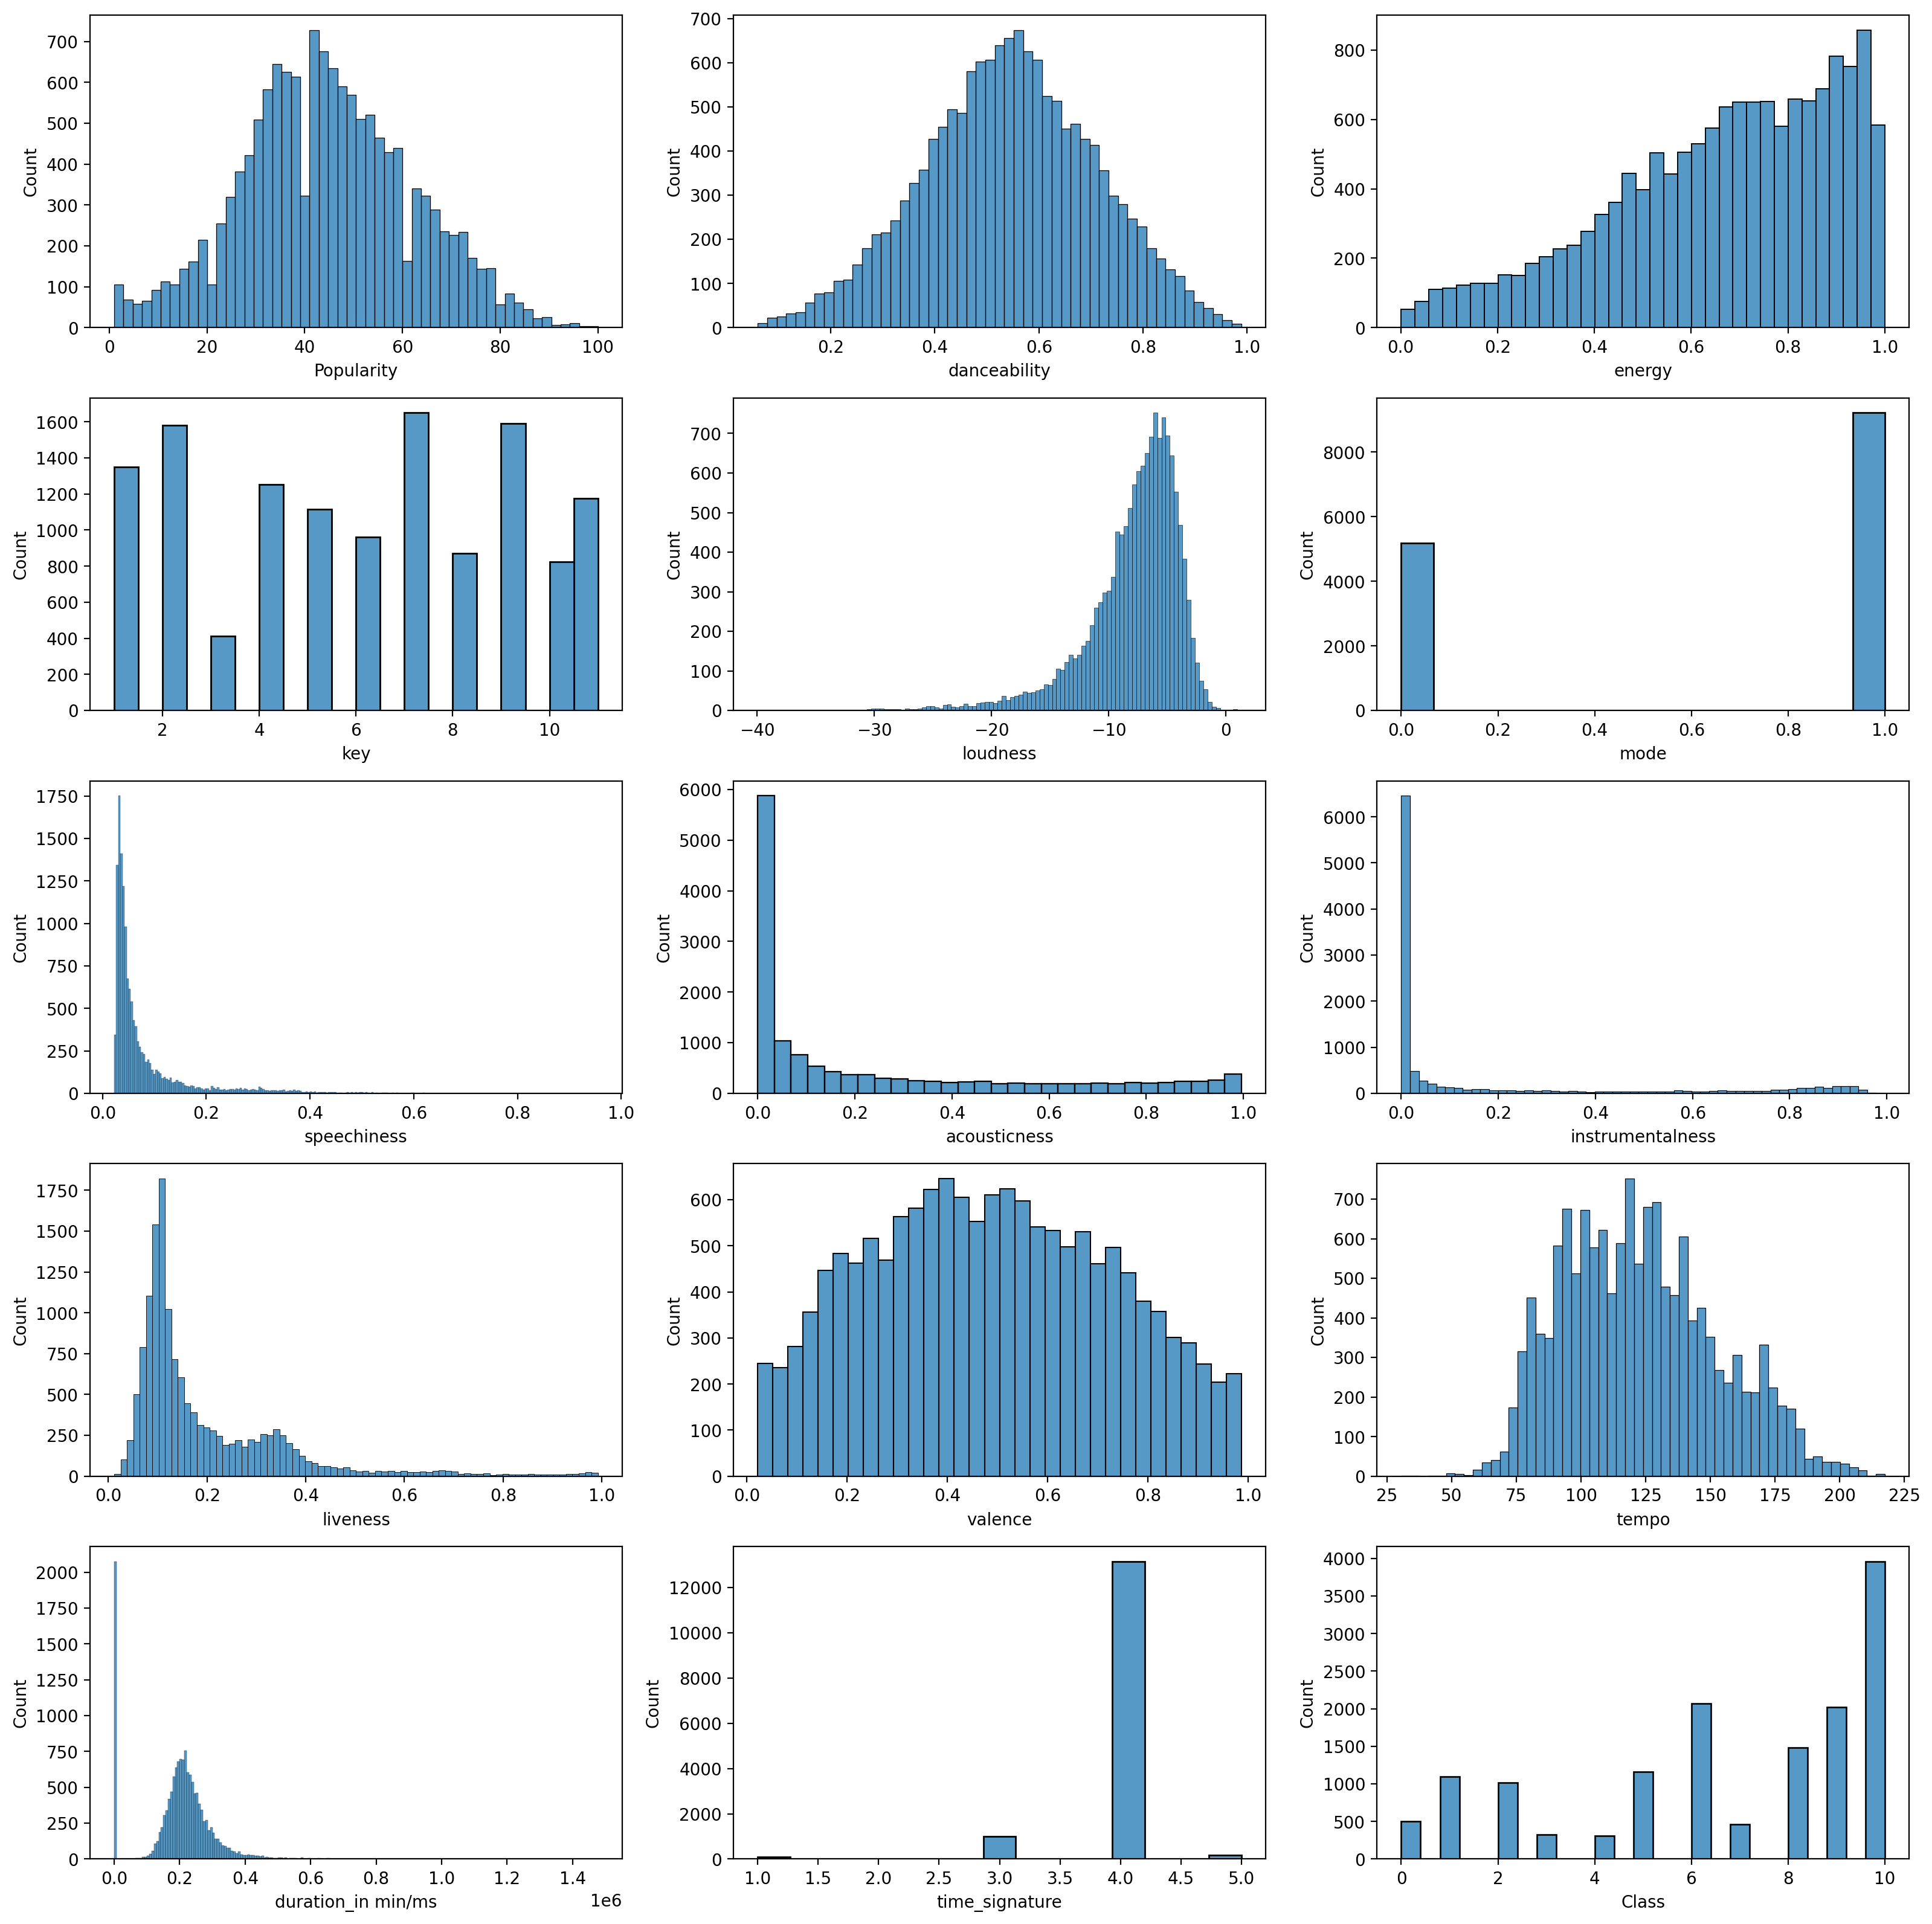

In [11]:
fig ,ax = plt.subplots(5,3,figsize=(16,16),dpi =200)
ax = ax.flatten()
for i, col in enumerate(df_num.columns):
    sns.histplot(data =df_num,  x=df_num[col], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

we can tell most of the values' distributions are gaussian distributions, with a few exceptions being skewed data.

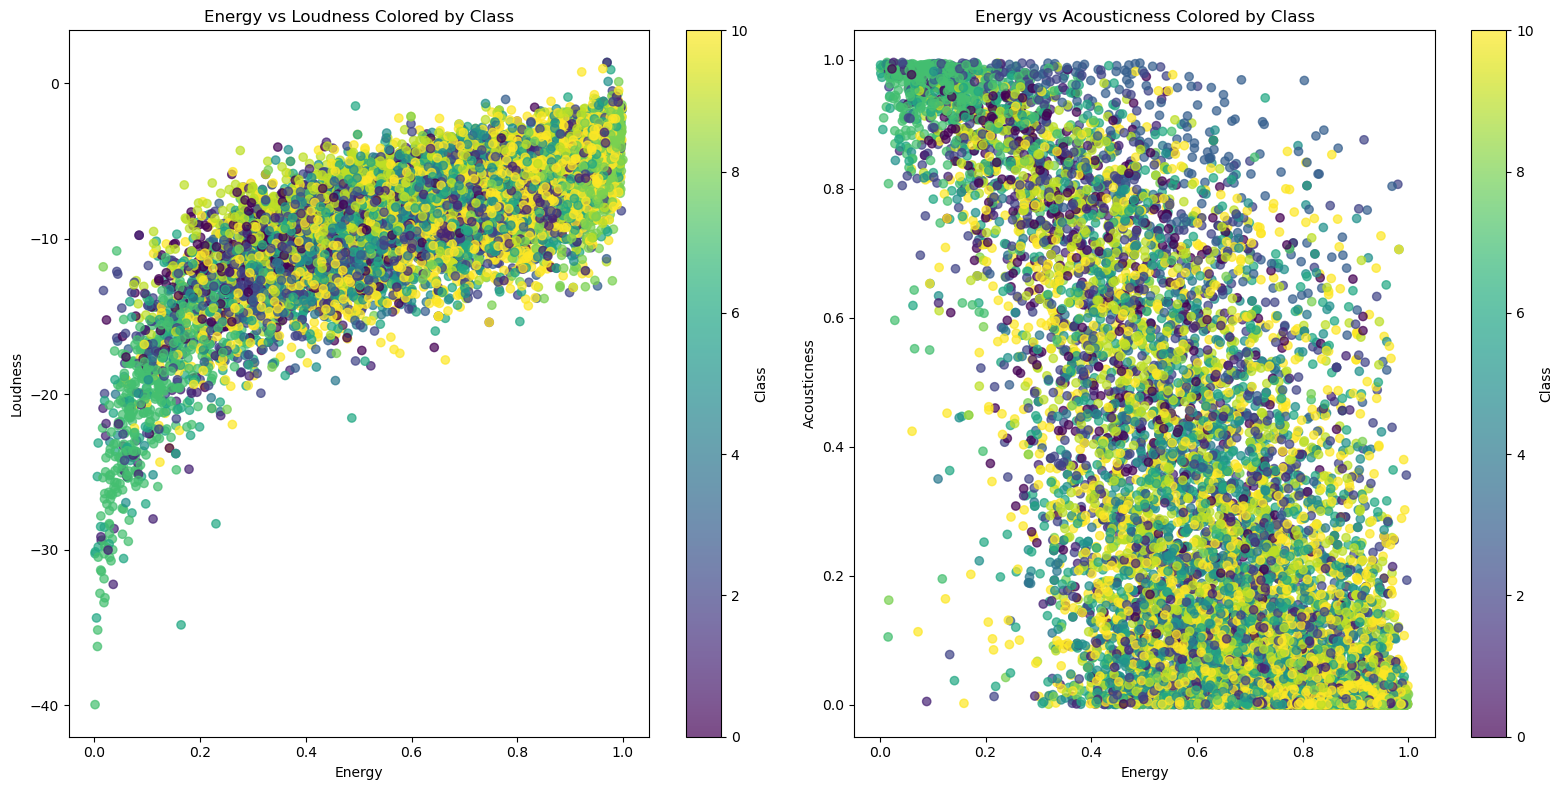

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=100)

scatter1 = ax[0].scatter(df_num['energy'], df_num['loudness'], c=df_num['Class'], cmap='viridis', alpha=0.7)
ax[0].set_xlabel('Energy')
ax[0].set_ylabel('Loudness')
ax[0].set_title('Energy vs Loudness Colored by Class')

cbar1 = plt.colorbar(scatter1, ax=ax[0], orientation='vertical')
cbar1.set_label('Class')

scatter2 = ax[1].scatter(df_num['energy'], df_num['acousticness'], c=df_num['Class'], cmap='viridis', alpha=0.7)
ax[1].set_xlabel('Energy')
ax[1].set_ylabel('Acousticness')
ax[1].set_title('Energy vs Acousticness Colored by Class')

cbar2 = plt.colorbar(scatter2, ax=ax[1], orientation='vertical')
cbar2.set_label('Class')

plt.tight_layout()
plt.show()

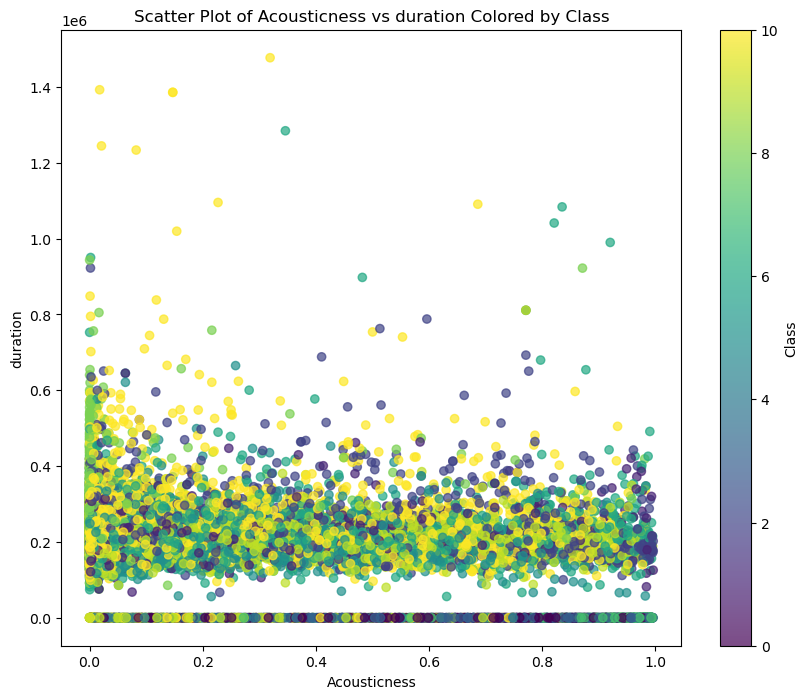

In [5]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(df_num['acousticness'], df_num['duration_in min/ms'], c=df_num['Class'], cmap='viridis', alpha=0.7)

plt.xlabel('Acousticness')
plt.ylabel('duration')
plt.title('Scatter Plot of Acousticness vs duration Colored by Class')

plt.colorbar(scatter, label='Class')

plt.show()

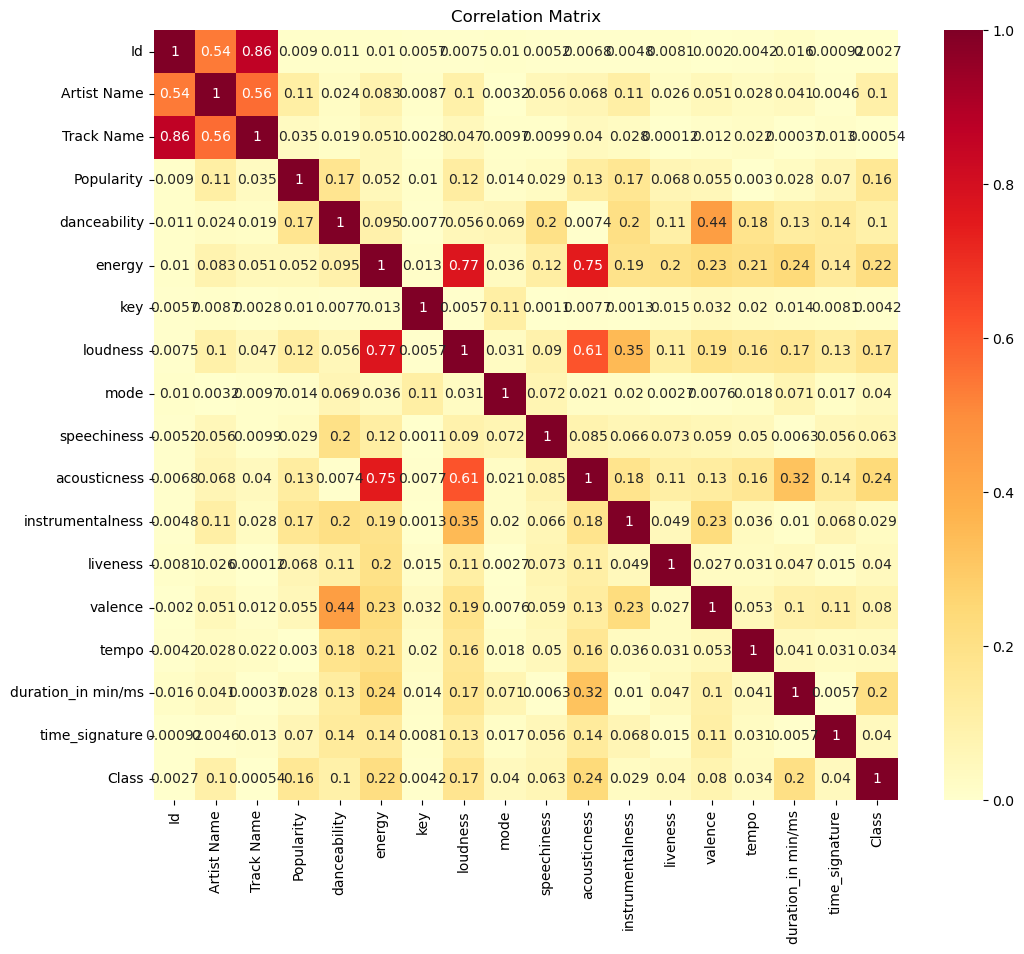

In [12]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def calculate_all_correlations(df):
    df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    for i in range(len(df.columns)):
        for j in range(i, len(df.columns)):
            col1, col2 = df.columns[i], df.columns[j]

            if df[col1].dtype in ['int64', 'float64'] and df[col2].dtype in ['int64', 'float64']:
                corr = abs(df[col1].corr(df[col2]))  # Use absolute value
            elif df[col1].dtype == 'object' and df[col2].dtype == 'object':
                corr = cramers_v(df[col1], df[col2])
            else:
                if df[col1].dtype in ['int64', 'float64']:
                    num, cat = col1, col2
                else:
                    num, cat = col2, col1
                corr = correlation_ratio(df[cat], df[num])

            corr_matrix.loc[col1, col2] = corr
            corr_matrix.loc[col2, col1] = corr

    # Convert to numeric and handle missing values
    corr_matrix = corr_matrix.apply(pd.to_numeric, errors='coerce').fillna(0)

    return corr_matrix

# Assuming your dataframe is called 'df'
correlation_matrix = calculate_all_correlations(df)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Base Model

In [7]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

## Base Data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify= y)


columns_to_drop = ["Artist Name", "Track Name"]

columns_to_impute = [col for col in X_train.columns if col not in columns_to_drop]

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('imputer', SimpleImputer(strategy='mean'), columns_to_impute)
    ],
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])


X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64       100
           1       0.00      0.00      0.00       220
           2       0.37      0.33      0.35       204
           3       0.68      0.72      0.70        64
           4       0.56      0.56      0.56        62
           5       0.67      0.65      0.66       231
           6       0.39      0.20      0.26       414
           7       0.90      0.89      0.90        92
           8       0.58      0.53      0.55       297
           9       0.44      0.42      0.43       404
          10       0.43      0.68      0.53       792

    accuracy                           0.49      2880
   macro avg       0.51      0.52      0.51      2880
weighted avg       0.45      0.49      0.46      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Omar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Omar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

Here we were just trying a base model with no extra handling to the data.
We dropped both the "Artist Name" & "Track Name" and imputed all the missing values in the same way using mean, and got an accuracy of 49% using LogisticRegression which is our base model. 

## Handling Data correctly

In [33]:
from sklearn.preprocessing import OneHotEncoder

X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

ordinal_features = ["Popularity", "key", "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11516, 6815)
X_test_processed shape: (2880, 6815)


In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       100
           1       0.07      0.01      0.02       220
           2       0.58      0.54      0.56       204
           3       0.78      0.80      0.79        64
           4       0.70      0.77      0.73        62
           5       0.74      0.74      0.74       231
           6       0.44      0.32      0.37       414
           7       0.89      0.91      0.90        92
           8       0.66      0.59      0.62       297
           9       0.58      0.58      0.58       404
          10       0.51      0.71      0.59       792

    accuracy                           0.57      2880
   macro avg       0.60      0.62      0.60      2880
weighted avg       0.54      0.57      0.55      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now we dropped the "Track Name" but kept the "Artist Name" feature since a certain artist could be an important feature regarding predicting the target value.

We also handled nulls accordingly, with mean and mode specefic to the feature's value, and got an improved accuracy of 57% using our base model.

## Handling the duration value correctly

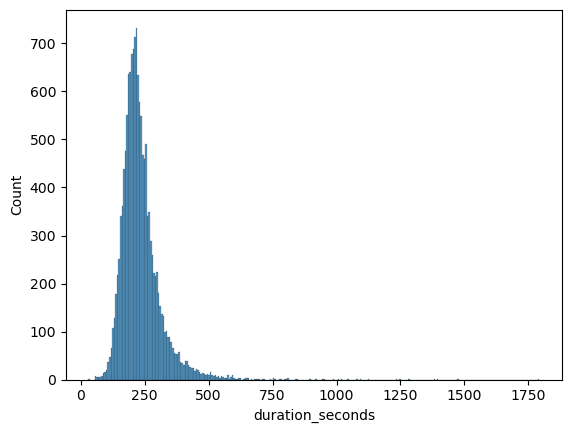

In [73]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X.loc[df['duration_in min/ms'] < 100, 'duration_in min/ms'] *= 60000

X['duration_seconds'] = X['duration_in min/ms'] / 1000

sns.histplot(data= X, x="duration_seconds")
plt.show()

X = X.drop(["Id"], axis=1)
X = X.drop(["duration_in min/ms"], axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

ordinal_features = ["Popularity", "key", "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11516, 6815)
X_test_processed shape: (2880, 6815)


In [75]:
logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.26      0.33       100
           1       0.03      0.00      0.01       220
           2       0.50      0.48      0.49       204
           3       0.73      0.67      0.70        64
           4       0.77      0.37      0.50        62
           5       0.75      0.75      0.75       231
           6       0.39      0.30      0.34       414
           7       0.73      0.84      0.78        92
           8       0.65      0.60      0.62       297
           9       0.55      0.58      0.57       404
          10       0.49      0.71      0.58       792

    accuracy                           0.53      2880
   macro avg       0.55      0.51      0.51      2880
weighted avg       0.50      0.53      0.51      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For this try, we noticed the value in the "duration_in min/ms" feature was not consistant, with some values being timed in minutes (the ones close to zero in the histogram) so we converted them to seconds so it's consistant.

But surprisengly, we got lower accuracy of 53% which is kinda weird.

## Dropping the "null" features

In [60]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11516, 6813)
X_test_processed shape: (2880, 6813)


In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       100
           1       0.04      0.00      0.01       220
           2       0.59      0.52      0.56       204
           3       0.82      0.80      0.81        64
           4       0.70      0.76      0.73        62
           5       0.74      0.74      0.74       231
           6       0.38      0.28      0.32       414
           7       0.85      0.90      0.87        92
           8       0.65      0.61      0.63       297
           9       0.58      0.57      0.58       404
          10       0.50      0.71      0.59       792

    accuracy                           0.57      2880
   macro avg       0.60      0.61      0.60      2880
weighted avg       0.53      0.57      0.54      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We tried dropping the "key" & "instrumentalness" features since they have very little correlation with the target and more than 1000 null values.

The accuracy stayed the same.

## Filling nulls using model predictions

In [67]:
X.isna().sum()

Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report


X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'Artist Name']
target = 'Popularity'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['danceability', 'energy', 'loudness', 'acousticness', 'valence']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Artist Name'])
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

X_train_pop = X.dropna(subset=[target])[features]
y_train_pop = X.dropna(subset=[target])[target].astype(int)

pipeline.fit(X_train_pop, y_train_pop)

X_train_pred = X[X[target].isna()][features]
predicted_values_train = pipeline.predict(X_train_pred)
X.loc[X[target].isna(), target] = predicted_values_train

print(f"Remaining missing values in '{target}' after imputation: {X[target].isna().sum()}")

y_train_pred = pipeline.predict(X_train_pop)
accuracy = accuracy_score(y_train_pop, y_train_pred)
print(f"Accuracy of the classifier on training data: {accuracy:.2f}")

Remaining missing values in 'Popularity' after imputation: 0
Accuracy of the classifier on training data: 0.99


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11516, 6813)
X_test_processed shape: (2880, 6813)


In [71]:
logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       100
           1       0.06      0.01      0.02       220
           2       0.58      0.51      0.54       204
           3       0.82      0.80      0.81        64
           4       0.67      0.74      0.70        62
           5       0.75      0.74      0.75       231
           6       0.38      0.28      0.32       414
           7       0.83      0.91      0.87        92
           8       0.65      0.62      0.64       297
           9       0.58      0.57      0.58       404
          10       0.50      0.71      0.59       792

    accuracy                           0.56      2880
   macro avg       0.59      0.60      0.59      2880
weighted avg       0.53      0.56      0.54      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy dropped by 1% so we'll stick to using mode for imputing the nulls.

## Feature engineering

In [83]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

X['energy_loudness_interaction'] = X['energy'] * X['loudness']

# df = df.drop(["energy", 'loudness'], axis=1)

X['danceability_tempo_interaction'] = X['danceability'] * X['tempo']
# df = df.drop(["danceability", 'tempo'], axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11516, 6815)
X_test_processed shape: (2880, 6815)


In [85]:
logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       100
           1       0.03      0.00      0.01       220
           2       0.59      0.53      0.56       204
           3       0.80      0.81      0.81        64
           4       0.64      0.74      0.69        62
           5       0.75      0.75      0.75       231
           6       0.39      0.29      0.33       414
           7       0.83      0.91      0.87        92
           8       0.66      0.59      0.63       297
           9       0.60      0.57      0.59       404
          10       0.50      0.72      0.59       792

    accuracy                           0.57      2880
   macro avg       0.59      0.61      0.59      2880
weighted avg       0.53      0.57      0.54      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No improvment.

## Outlier Detection

In [158]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [105]:
numeric_cols = X_train.select_dtypes(include='float64')

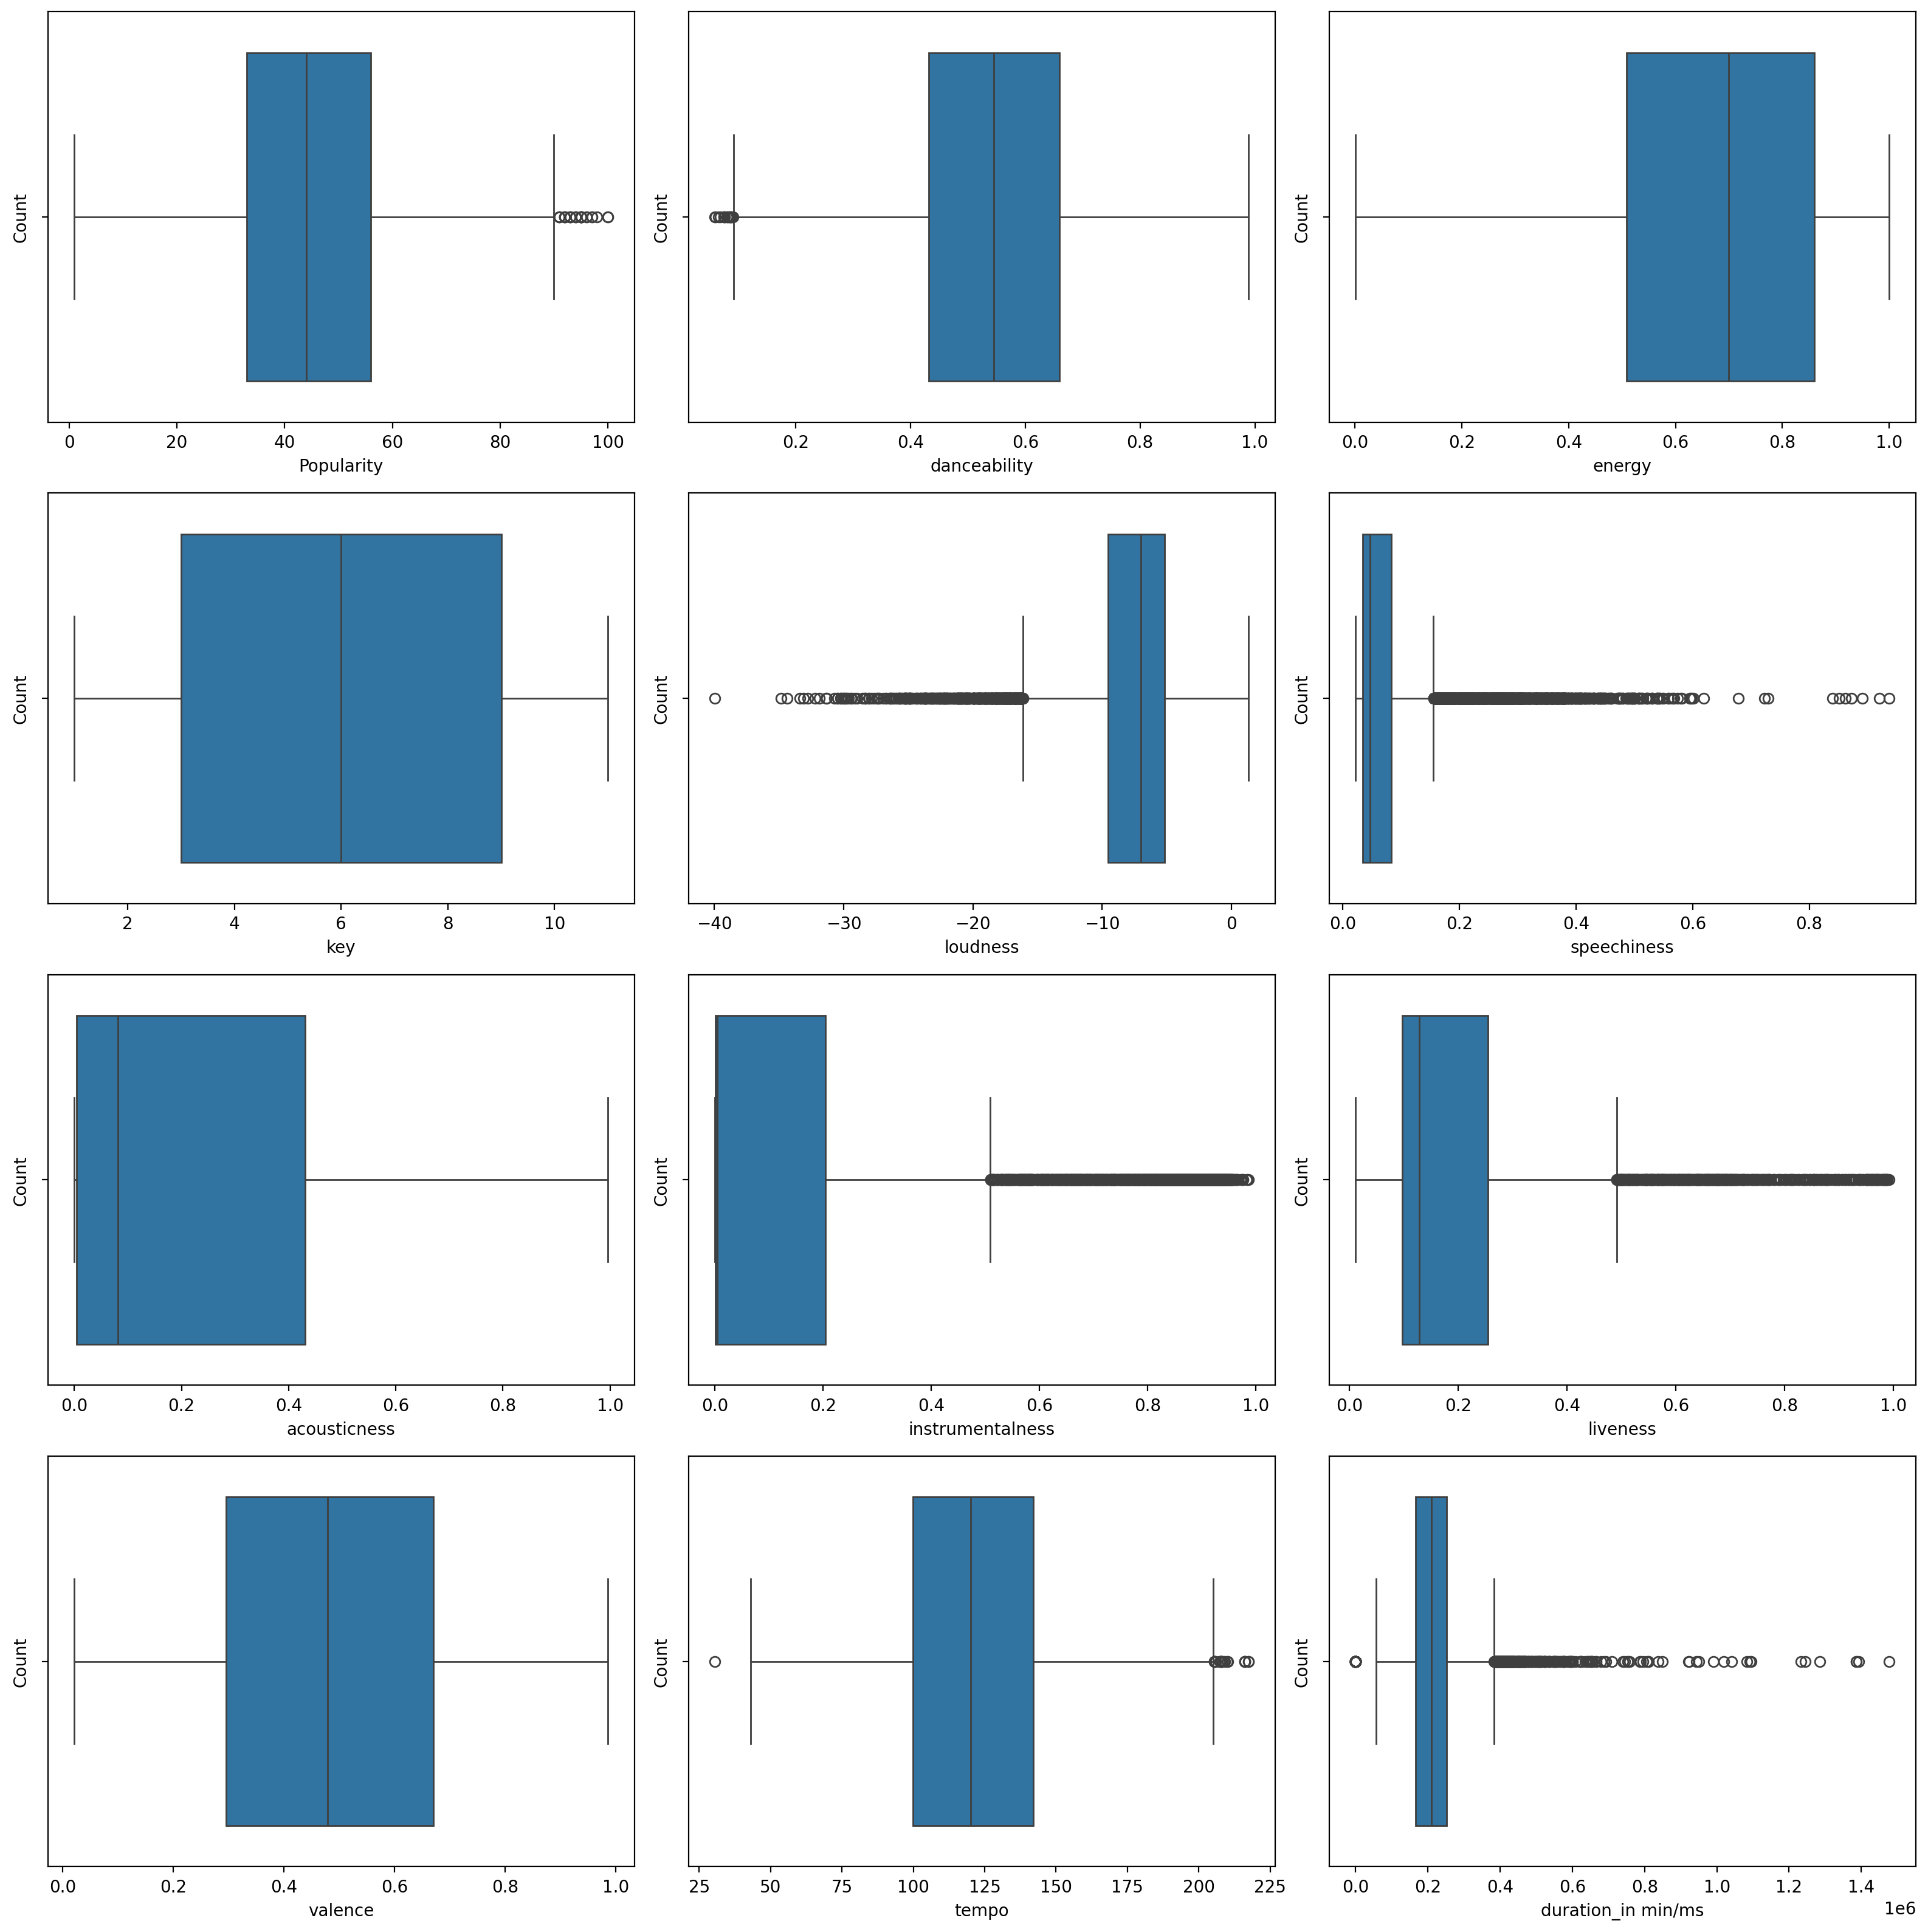

In [94]:
fig ,ax = plt.subplots(4,3,figsize=(16,16),dpi =200)
ax = ax.flatten()
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data =X_train,  x=X_train[col], ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [159]:
Q1 = numeric_cols.quantile(0.10)
Q3 = numeric_cols.quantile(0.90)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR  
min_value = Q1 - 1.5 * IQR  

outliers_mask = (numeric_cols < min_value) | (numeric_cols > max_value)

X_train_no_outliers = X_train[~outliers_mask.any(axis=1)].reset_index(drop=True)
y_train_no_outliers = y_train[~outliers_mask.any(axis=1)].reset_index(drop=True)

total_outliers = outliers_mask.sum()

print("Total outliers for each numeric variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())


Total outliers for each numeric variable:
Popularity              0
danceability            0
energy                  0
key                     0
loudness               41
speechiness           170
acousticness            0
instrumentalness        0
liveness              142
valence                 0
tempo                   0
duration_in min/ms     25
dtype: int64
Total outliers: 378


In [128]:
print(f'Actual number of outlier points removed is {X_train.shape[0] - X_train_no_outliers.shape[0]}')

Actual number of outlier points removed is 375


In [129]:
# # Select numeric columns from the updated X_train without outliers
# numeric_cols_no_outliers = X_train_no_outliers.select_dtypes(include='float64')

# # Set up the figure and axes for subplots
# fig, ax = plt.subplots(4, 3, figsize=(16, 16), dpi=200)
# ax = ax.flatten()

# # Custom flierprops to change the color of outliers
# flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')

# # Loop through each numeric column and plot the boxplot with customized outlier color
# for i, col in enumerate(numeric_cols_no_outliers.columns):
#     sns.boxplot(data=X_train_no_outliers, x=X_train_no_outliers[col], ax=ax[i], flierprops=flierprops)
#     ax[i].set_xlabel(col)
#     ax[i].set_ylabel('Count')

# # Adjust the layout to prevent overlap
# plt.tight_layout()
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

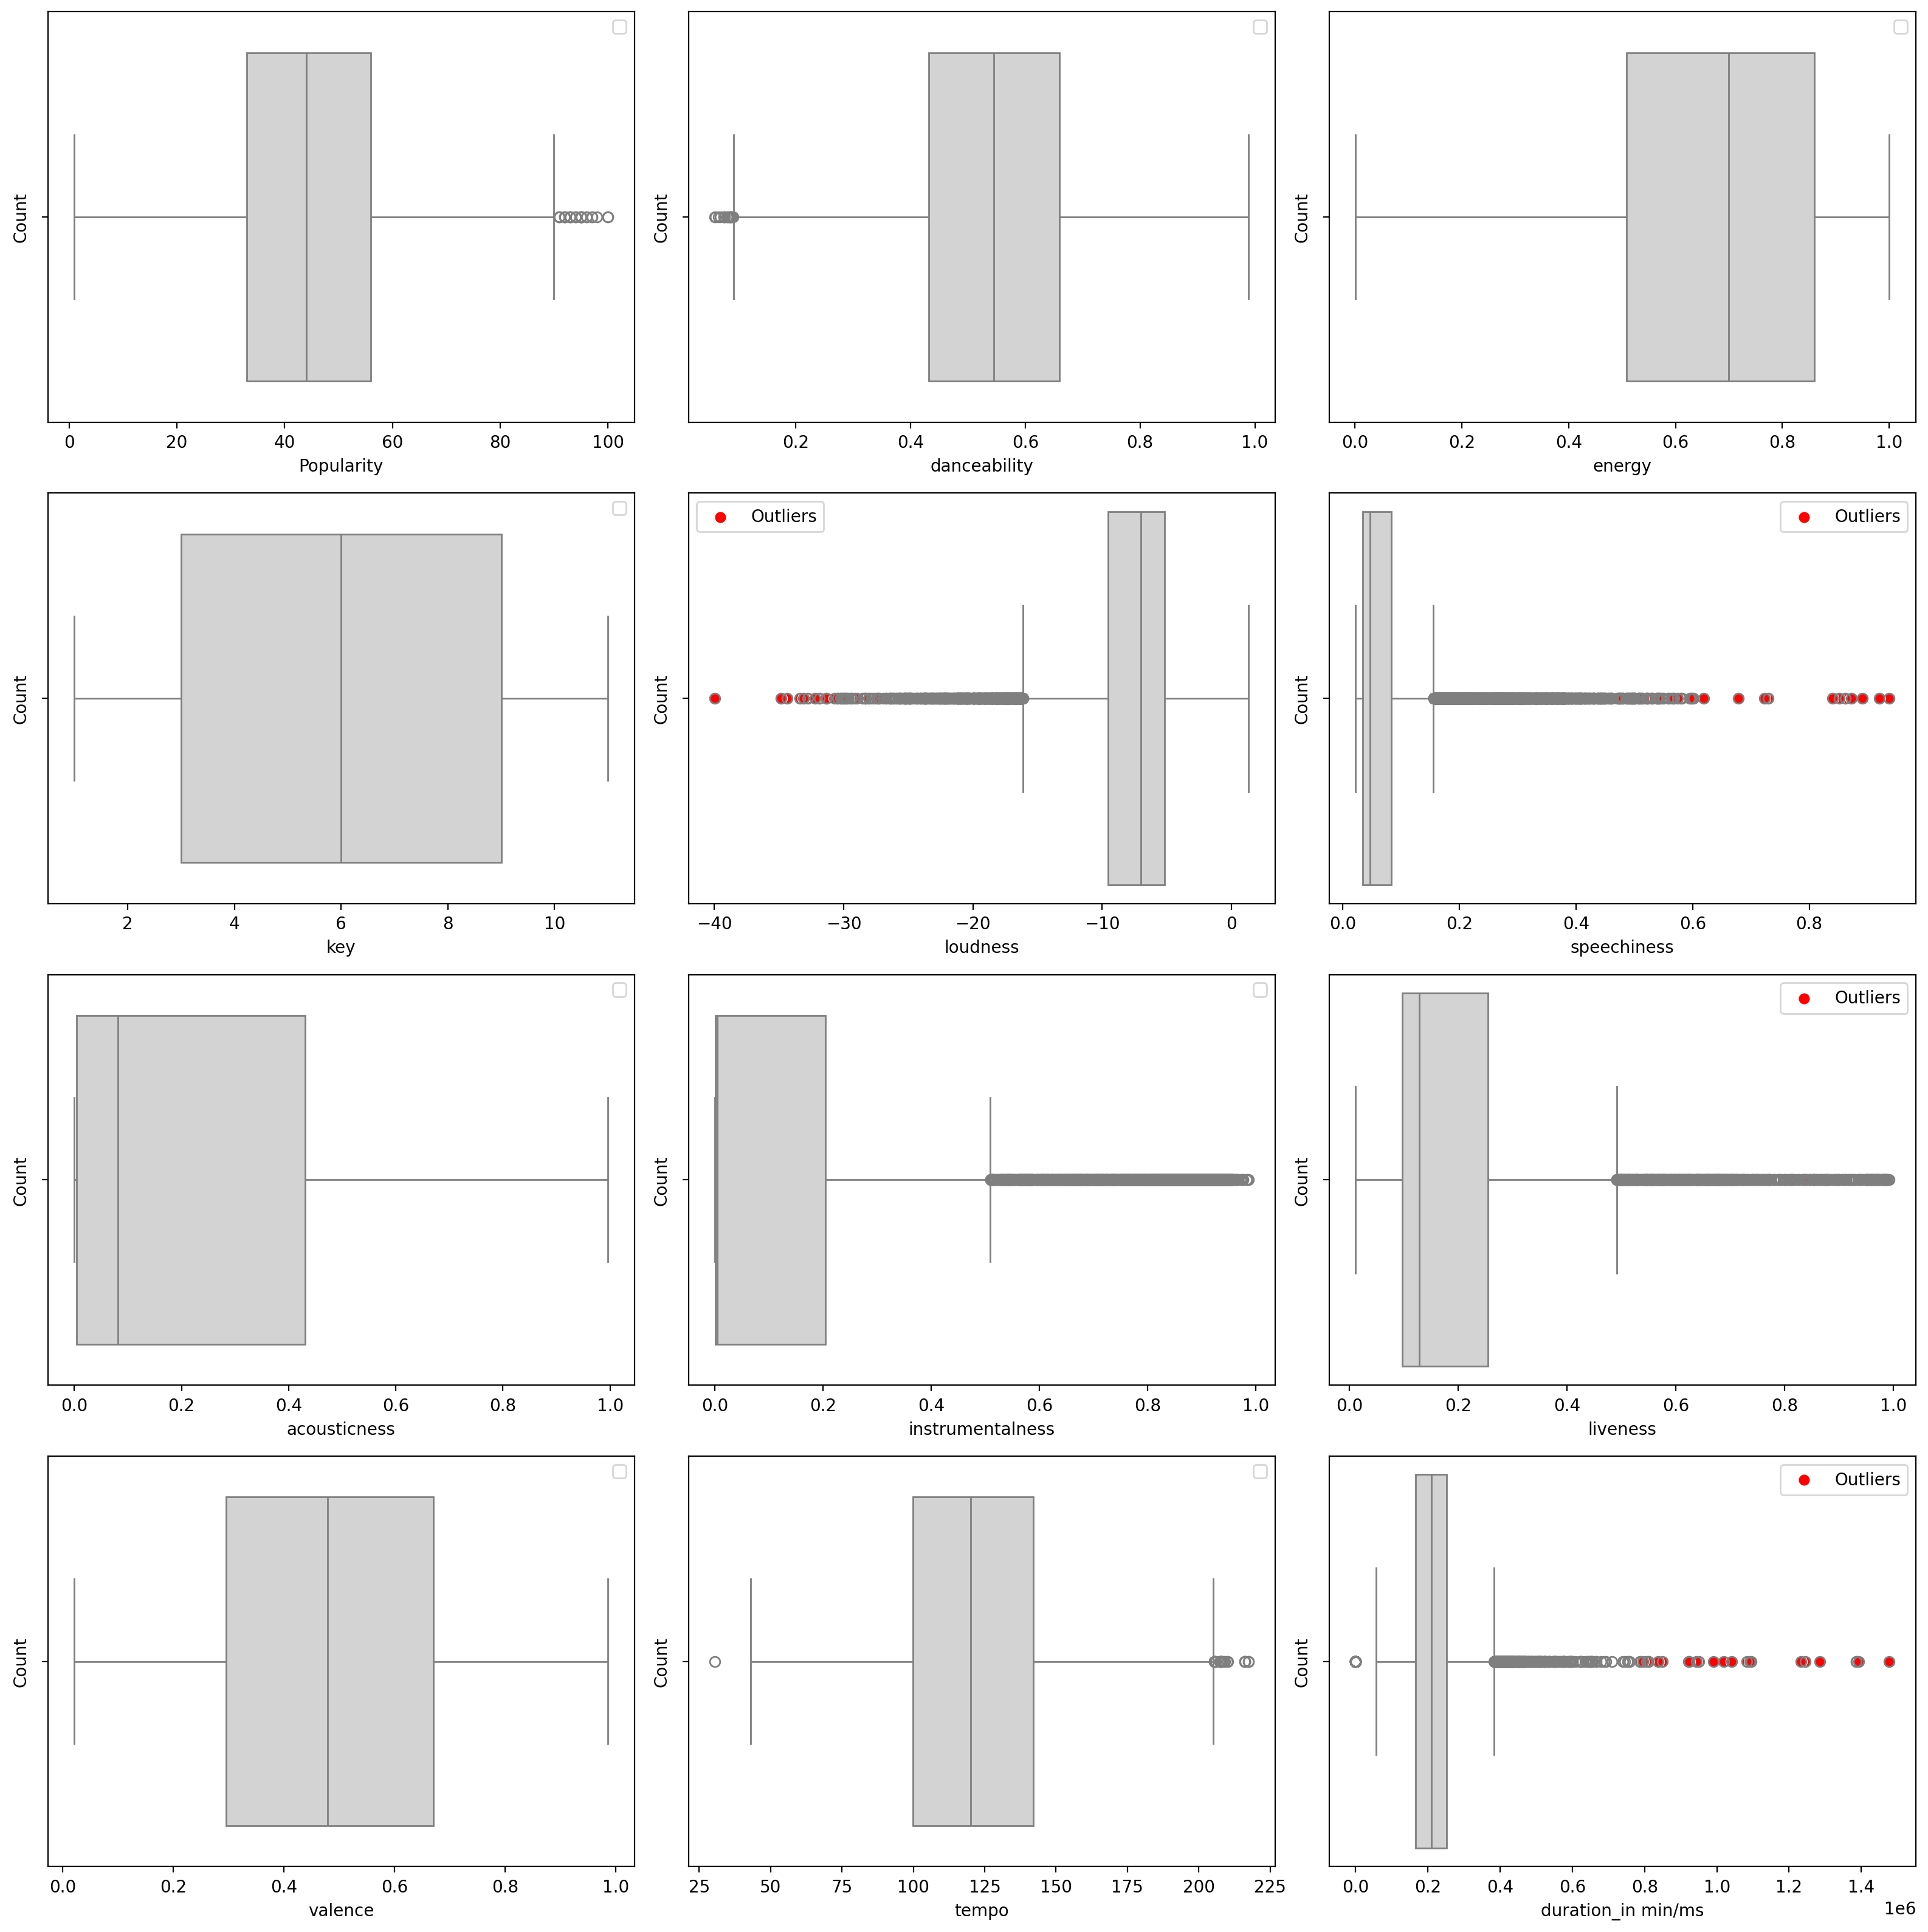

In [130]:
fig, ax = plt.subplots(4, 3, figsize=(16, 16), dpi=200)
ax = ax.flatten()


for i, col in enumerate(numeric_cols.columns):

    sns.boxplot(data=X_train, x=X_train[col], ax=ax[i], color='lightgray')
    
    outliers = X_train[outliers_mask[col]]
    sns.scatterplot(x=outliers[col], y=[0]*len(outliers), color='red', ax=ax[i], s=50, marker='o', label='Outliers')

    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
    ax[i].legend()

plt.tight_layout()
plt.show()

In [131]:
ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train_no_outliers)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11141, 6614)
X_test_processed shape: (2880, 6614)


In [132]:
logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train_no_outliers)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       100
           1       0.04      0.00      0.01       220
           2       0.59      0.52      0.56       204
           3       0.84      0.80      0.82        64
           4       0.70      0.79      0.74        62
           5       0.72      0.75      0.74       231
           6       0.38      0.27      0.32       414
           7       0.82      0.91      0.87        92
           8       0.65      0.61      0.63       297
           9       0.60      0.56      0.58       404
          10       0.50      0.71      0.59       792

    accuracy                           0.57      2880
   macro avg       0.59      0.61      0.60      2880
weighted avg       0.53      0.57      0.54      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No improvement, but nonetheless we'll keep this and move on to models.

## Trying SMOTE

In [155]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before resampling: {sorted(Counter(y_train_no_outliers).items())}')
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X_train_processed, y_train_no_outliers)
print(f'After resampling: {sorted(Counter(y_resampled).items())}')

Before resampling: [(0, 400), (1, 864), (2, 782), (3, 247), (4, 245), (5, 803), (6, 1623), (7, 343), (8, 1167), (9, 1564), (10, 3103)]
After resampling: [(0, 3103), (1, 3103), (2, 3103), (3, 3103), (4, 3103), (5, 3103), (6, 3103), (7, 3103), (8, 3103), (9, 3103), (10, 3103)]


In [134]:
logmodel = LogisticRegression()
logmodel.fit(X_resampled,y_resampled)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       100
           1       0.14      0.11      0.12       220
           2       0.49      0.72      0.58       204
           3       0.78      0.84      0.81        64
           4       0.63      0.90      0.74        62
           5       0.68      0.82      0.75       231
           6       0.41      0.35      0.38       414
           7       0.83      0.93      0.88        92
           8       0.54      0.75      0.63       297
           9       0.58      0.55      0.57       404
          10       0.60      0.47      0.53       792

    accuracy                           0.55      2880
   macro avg       0.58      0.65      0.61      2880
weighted avg       0.54      0.55      0.54      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


although the F1-Score for the lower classes improved, the overall score dropped so we won't be using it.

## Dimensionality Reduction

### PCA

In [ ]:
from sklearn.decomposition import PCA

X_train_processed_arr = X_train_processed.toarray()
X_test_processed_arr = X_test_processed.toarray()

pca = PCA(n_components=0.95)  # Keep 95% of the variance, adjust as needed
X_train_pca = pca.fit_transform(X_train_processed_arr)
X_test_pca = pca.transform(X_test_processed_arr)

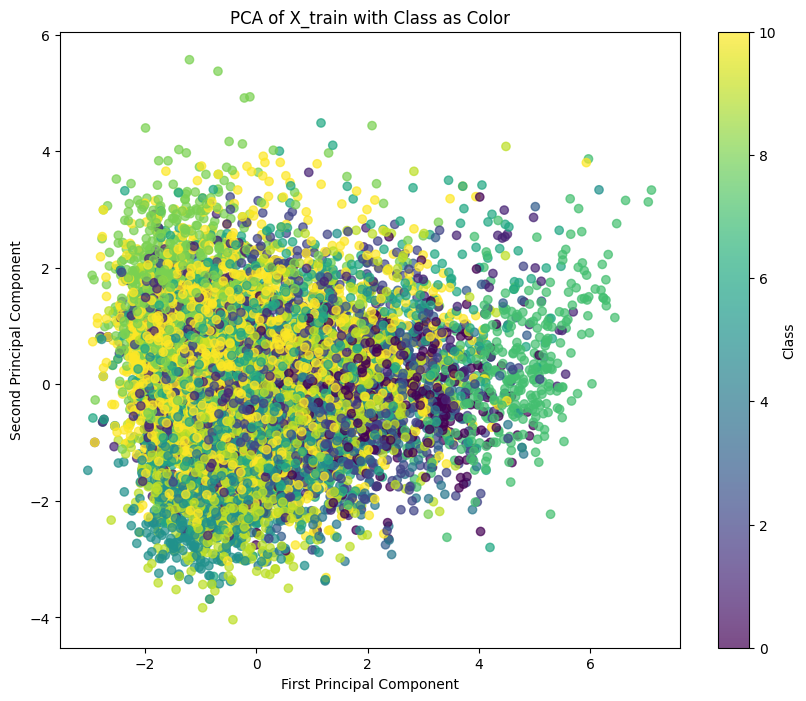

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)

scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_no_outliers, cmap='viridis', alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of X_train with Class as Color')

plt.colorbar(scatter, label='Class')

plt.show()

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train_pca, y_train_no_outliers)

y_pred = logmodel.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       100
           1       0.07      0.00      0.01       220
           2       0.51      0.44      0.47       204
           3       0.79      0.78      0.79        64
           4       0.63      0.76      0.69        62
           5       0.69      0.72      0.70       231
           6       0.37      0.22      0.28       414
           7       0.82      0.90      0.86        92
           8       0.61      0.59      0.60       297
           9       0.57      0.53      0.55       404
          10       0.48      0.71      0.57       792

    accuracy                           0.54      2880
   macro avg       0.56      0.58      0.56      2880
weighted avg       0.50      0.54      0.51      2880



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Trying models

We've decided to only drop 'key" & "instrumentalness". and imputed the nulls in "popularity" using mode.
No additional feature enginnering were performed and no SMOTE.
The data was only cleaned from outliers.

In [154]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train_no_outliers)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11141, 6614)
X_test_processed shape: (2880, 6614)


In [148]:
logmodel = LogisticRegression()
logmodel.fit(X_train_processed,y_train_no_outliers)

y_pred = logmodel.predict(X_test_processed)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       100
           1       0.04      0.00      0.01       220
           2       0.59      0.52      0.56       204
           3       0.84      0.80      0.82        64
           4       0.70      0.79      0.74        62
           5       0.72      0.75      0.74       231
           6       0.38      0.27      0.32       414
           7       0.82      0.91      0.87        92
           8       0.65      0.61      0.63       297
           9       0.60      0.56      0.58       404
          10       0.50      0.71      0.59       792

    accuracy                           0.57      2880
   macro avg       0.59      0.61      0.60      2880
weighted avg       0.53      0.57      0.54      2880



C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## RandomForest

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_processed, y_train_no_outliers)
y_pred = rf.predict(X_test_processed)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       108
           1       0.02      0.04      0.03        89
           2       0.38      0.65      0.48       118
           3       0.69      0.85      0.76        52
           4       0.71      0.76      0.73        58
           5       0.72      0.72      0.72       232
           6       0.20      0.30      0.24       276
           7       0.92      0.85      0.89       100
           8       0.47      0.63      0.54       222
           9       0.55      0.58      0.56       385
          10       0.69      0.44      0.54      1240

    accuracy                           0.52      2880
   macro avg       0.55      0.59      0.56      2880
weighted avg       0.59      0.52      0.54      2880



## NB

In [140]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_processed.toarray(), y_train_no_outliers)

y_pred = nb.predict(X_test_processed.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.22      0.35       100
           1       0.15      0.20      0.17       220
           2       0.16      0.90      0.27       204
           3       0.26      1.00      0.41        64
           4       0.95      0.63      0.76        62
           5       0.83      0.45      0.58       231
           6       0.38      0.19      0.25       414
           7       1.00      0.20      0.33        92
           8       0.67      0.45      0.54       297
           9       0.62      0.45      0.52       404
          10       0.67      0.24      0.35       792

    accuracy                           0.37      2880
   macro avg       0.60      0.45      0.41      2880
weighted avg       0.57      0.37      0.39      2880



## KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_processed, y_train_no_outliers)

y_pred = knn.predict(X_test_processed)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       116
           1       0.08      0.17      0.11       103
           2       0.35      0.40      0.37       182
           3       0.64      0.76      0.69        54
           4       0.60      0.54      0.56        69
           5       0.67      0.64      0.66       242
           6       0.25      0.28      0.26       366
           7       0.86      0.81      0.84        97
           8       0.50      0.49      0.49       304
           9       0.47      0.49      0.48       385
          10       0.53      0.44      0.48       962

    accuracy                           0.46      2880
   macro avg       0.52      0.51      0.51      2880
weighted avg       0.49      0.46      0.48      2880



## SVC

In [142]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_processed, y_train_no_outliers)

y_pred = svm_clf.predict(X_test_processed)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       121
           1       0.00      1.00      0.01         1
           2       0.39      0.56      0.46       142
           3       0.64      0.85      0.73        48
           4       0.65      0.62      0.63        65
           5       0.71      0.69      0.70       239
           6       0.20      0.42      0.27       196
           7       0.88      0.84      0.86        97
           8       0.44      0.65      0.53       204
           9       0.55      0.57      0.56       390
          10       0.79      0.45      0.57      1377

    accuracy                           0.54      2880
   macro avg       0.55      0.66      0.55      2880
weighted avg       0.66      0.54      0.57      2880



## XGBoost

In [149]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_processed, y_train_no_outliers)

y_pred = xgb_clf.predict(X_test_processed)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       120
           1       0.04      0.20      0.07        46
           2       0.49      0.54      0.51       185
           3       0.75      0.87      0.81        55
           4       0.65      0.70      0.67        57
           5       0.72      0.72      0.72       231
           6       0.23      0.33      0.27       288
           7       0.89      0.89      0.89        92
           8       0.56      0.62      0.59       266
           9       0.57      0.57      0.57       404
          10       0.70      0.49      0.58      1136

    accuracy                           0.55      2880
   macro avg       0.58      0.60      0.58      2880
weighted avg       0.61      0.55      0.57      2880



## CatBoost

In [151]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

ordinal_features = ['Popularity', "mode", "time_signature"]
# one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features)
#         ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train_no_outliers)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11141, 12)
X_test_processed shape: (2880, 12)


In [152]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(silent=True, random_state=42)

catboost_clf.fit(X_train_processed, y_train_no_outliers)

y_pred = catboost_clf.predict(X_test_processed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       100
           1       0.16      0.04      0.06       220
           2       0.51      0.45      0.48       204
           3       0.76      0.81      0.79        64
           4       0.65      0.56      0.60        62
           5       0.69      0.70      0.69       231
           6       0.30      0.22      0.26       414
           7       0.89      0.86      0.87        92
           8       0.59      0.53      0.56       297
           9       0.50      0.53      0.51       404
          10       0.45      0.62      0.52       792

    accuracy                           0.51      2880
   macro avg       0.56      0.55      0.55      2880
weighted avg       0.48      0.51      0.49      2880



In [156]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(silent=True, random_state=42)

catboost_clf.fit(X_resampled,y_resampled)

y_pred = catboost_clf.predict(X_test_processed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       100
           1       0.15      0.17      0.16       220
           2       0.37      0.68      0.48       204
           3       0.72      0.77      0.74        64
           4       0.52      0.82      0.63        62
           5       0.63      0.82      0.71       231
           6       0.40      0.28      0.33       414
           7       0.85      0.88      0.87        92
           8       0.47      0.76      0.58       297
           9       0.60      0.49      0.54       404
          10       0.57      0.36      0.44       792

    accuracy                           0.50      2880
   macro avg       0.54      0.61      0.56      2880
weighted avg       0.51      0.50      0.49      2880



## HP tuning on best models

In [160]:
ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train_no_outliers)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11141, 6614)
X_test_processed shape: (2880, 6614)


In [162]:
from sklearn.model_selection import GridSearchCV


# Define the models and hyperparameter grids
param_grid = {
    'logistic_regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'svc': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'xgboost': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }
}

# Perform grid search for each model using F1-score as the scoring metric
best_models = {}
for name, mp in param_grid.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
    clf.fit(X_train_processed, y_train_no_outliers)
    best_models[name] = clf
    print(f"Best parameters for {name}: {clf.best_params_}")
    print(f"Best cross-validation F1-score for {name}: {clf.best_score_:.4f}\n")

# Evaluate the best model on the test set
for name, clf in best_models.items():
    y_pred = clf.predict(X_test_processed)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for logistic_regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1-score for logistic_regression: 0.5521

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for svc: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation F1-score for svc: 0.5468

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for xgboost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation F1-score for xgboost: 0.5221

Classification Report for logistic_regression:

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       100
           1       0.12      0.05      0.07       220
           2       0.63      0.57      0.60       204
           3       0.87      0.84      0.86        64
           4       0.77      0.76      0.76        62
         

## Ensemble Learning

### Voting

In [164]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('logistic', best_models['logistic_regression'].best_estimator_),
    ('svc', best_models['svc'].best_estimator_),
    ('xgboost', best_models['xgboost'].best_estimator_)
], voting='hard')  

voting_clf.fit(X_train_processed, y_train_no_outliers)

y_pred = voting_clf.predict(X_test_processed)

print("Classification Report for Voting Classifier:\n")
print(classification_report(y_test, y_pred))


Classification Report for Voting Classifier:

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       100
           1       0.10      0.05      0.06       220
           2       0.60      0.54      0.57       204
           3       0.87      0.83      0.85        64
           4       0.73      0.79      0.76        62
           5       0.74      0.82      0.78       231
           6       0.41      0.32      0.36       414
           7       0.88      0.91      0.89        92
           8       0.71      0.58      0.64       297
           9       0.66      0.56      0.60       404
          10       0.52      0.72      0.60       792

    accuracy                           0.58      2880
   macro avg       0.63      0.63      0.62      2880
weighted avg       0.56      0.58      0.57      2880



### Stacking

In [165]:
from sklearn.ensemble import StackingClassifier


stacking_clf = StackingClassifier(
    estimators=[
        ('logistic', best_models['logistic_regression'].best_estimator_),
        ('svc', best_models['svc'].best_estimator_),
        ('xgboost', best_models['xgboost'].best_estimator_)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

stacking_clf.fit(X_train_processed, y_train_no_outliers)

y_pred = stacking_clf.predict(X_test_processed)

print("Classification Report for Stacking Classifier:\n")
print(classification_report(y_test, y_pred))


C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.32      0.04      0.07       220
           2       0.64      0.60      0.62       204
           3       0.87      0.84      0.86        64
           4       0.82      0.85      0.83        62
           5       0.76      0.78      0.77       231
           6       0.43      0.42      0.43       414
           7       0.88      0.93      0.91        92
           8       0.71      0.66      0.69       297
           9       0.66      0.63      0.64       404
          10       0.55      0.71      0.62       792

    accuracy                           0.62      2880
   macro avg       0.67      0.66      0.66      2880
weighted avg       0.60      0.62      0.60      2880



Finally, Better results.

### Bagging

In [168]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    estimator=best_models['xgboost'].best_estimator_,
    n_estimators=10, random_state=42
)

bagging_clf.fit(X_train_processed, y_train_no_outliers)

y_pred = bagging_clf.predict(X_test_processed)

print("Classification Report for Bagging Classifier:\n")
print(classification_report(y_test, y_pred))


Classification Report for Bagging Classifier:

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       100
           1       0.40      0.02      0.03       220
           2       0.53      0.48      0.50       204
           3       0.78      0.73      0.76        64
           4       0.68      0.58      0.63        62
           5       0.71      0.74      0.73       231
           6       0.37      0.26      0.31       414
           7       0.87      0.89      0.88        92
           8       0.63      0.56      0.59       297
           9       0.59      0.58      0.59       404
          10       0.50      0.73      0.59       792

    accuracy                           0.56      2880
   macro avg       0.61      0.58      0.57      2880
weighted avg       0.54      0.56      0.53      2880



## Trying Neural Networks

In [194]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()

X = X.drop(["Id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [195]:
numeric_cols = X_train.select_dtypes(include='float64')

In [196]:

Q1 = numeric_cols.quantile(0.10)
Q3 = numeric_cols.quantile(0.90)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR  
min_value = Q1 - 1.5 * IQR  

outliers_mask = (numeric_cols < min_value) | (numeric_cols > max_value)

X_train_no_outliers = X_train[~outliers_mask.any(axis=1)].reset_index(drop=True)
y_train_no_outliers = y_train[~outliers_mask.any(axis=1)].reset_index(drop=True)

total_outliers = outliers_mask.sum()

print("Total outliers for each numeric variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())


Total outliers for each numeric variable:
Popularity              0
danceability            0
energy                  0
key                     0
loudness               41
speechiness           170
acousticness            0
instrumentalness        0
liveness              142
valence                 0
tempo                   0
duration_in min/ms     25
dtype: int64
Total outliers: 378


In [197]:
print("Unique values in y_train_no_outliers:", np.unique(y_train_no_outliers))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train_no_outliers: [ 0  1  2  3  4  5  6  7  8  9 10]
Unique values in y_test: [ 0  1  2  3  4  5  6  7  8  9 10]


In [227]:
ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_train.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_train.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_train_no_outliers)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (11141, 6614)
X_test_processed shape: (2880, 6614)


In [199]:
print("Unique values in y_train_no_outliers:", np.unique(y_train_no_outliers))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train_no_outliers: [ 0  1  2  3  4  5  6  7  8  9 10]
Unique values in y_test: [ 0  1  2  3  4  5  6  7  8  9 10]


In [200]:
y_train_cat = to_categorical(y_train_no_outliers)
y_test_cat = to_categorical(y_test)

print("Shape of y_train_cat:", y_train_cat.shape)
print("Unique values in y_train_cat:", np.unique(y_train_cat))

print("Shape of y_test_cat:", y_test_cat.shape)
print("Unique values in y_test_cat:", np.unique(y_test_cat))

Shape of y_train_cat: (11141, 11)
Unique values in y_train_cat: [0. 1.]
Shape of y_test_cat: (2880, 11)
Unique values in y_test_cat: [0. 1.]


In [206]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


X_train_processed = X_train_processed.toarray()
X_test_processed = X_test_processed.toarray()

y_train_cat = to_categorical(y_train_no_outliers)
y_test_cat = to_categorical(y_test)

model = Sequential([
    Dense(64, input_dim=X_train_processed.shape[1], activation='relu'), 
    Dropout(0.5),  
    Dense(64, activation='relu'), 
    Dropout(0.5),  
    Dense(y_train_cat.shape[1], activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_processed, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

y_pred = model.predict(X_test_processed)

y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)


print("Classification Report for Neural Network:\n")
print(classification_report(y_test, y_pred_classes))

Epoch 1/50
279/279 - 2s - loss: 1.9519 - accuracy: 0.3159 - val_loss: 1.5432 - val_accuracy: 0.4410 - 2s/epoch - 7ms/step
Epoch 2/50
279/279 - 1s - loss: 1.6101 - accuracy: 0.4054 - val_loss: 1.4061 - val_accuracy: 0.4886 - 1s/epoch - 4ms/step
Epoch 3/50
279/279 - 1s - loss: 1.4511 - accuracy: 0.4533 - val_loss: 1.3313 - val_accuracy: 0.5105 - 1s/epoch - 4ms/step
Epoch 4/50
279/279 - 1s - loss: 1.3482 - accuracy: 0.4982 - val_loss: 1.2652 - val_accuracy: 0.5357 - 1s/epoch - 4ms/step
Epoch 5/50
279/279 - 1s - loss: 1.1914 - accuracy: 0.5583 - val_loss: 1.2231 - val_accuracy: 0.5523 - 1s/epoch - 4ms/step
Epoch 6/50
279/279 - 1s - loss: 1.0406 - accuracy: 0.6309 - val_loss: 1.2032 - val_accuracy: 0.5855 - 1s/epoch - 4ms/step
Epoch 7/50
279/279 - 1s - loss: 0.8951 - accuracy: 0.6929 - val_loss: 1.2131 - val_accuracy: 0.5877 - 1s/epoch - 4ms/step
Epoch 8/50
279/279 - 1s - loss: 0.7695 - accuracy: 0.7400 - val_loss: 1.2573 - val_accuracy: 0.5787 - 1s/epoch - 4ms/step
Epoch 9/50
279/279 - 1s 

In [228]:
X_train_processed = X_train_processed.toarray()
X_test_processed = X_test_processed.toarray()

y_train_cat = to_categorical(y_train_no_outliers)
y_test_cat = to_categorical(y_test)


model = Sequential([
    Dense(64, input_dim=X_train_processed.shape[1], activation='relu'),  
#     Dropout(0.5),  
    Dense(y_train_cat.shape[1], activation='softmax') 
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_processed, y_train_cat, epochs=25, batch_size=32, validation_split=0.2, verbose=2)

y_pred = model.predict(X_test_processed)

y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)


print("Classification Report for Neural Network:\n")
print(classification_report(y_test, y_pred_classes))

Epoch 1/25
279/279 - 2s - loss: 1.7725 - accuracy: 0.4029 - val_loss: 1.4515 - val_accuracy: 0.4747 - 2s/epoch - 7ms/step
Epoch 2/25
279/279 - 1s - loss: 1.3251 - accuracy: 0.5230 - val_loss: 1.3109 - val_accuracy: 0.5128 - 1s/epoch - 4ms/step
Epoch 3/25
279/279 - 1s - loss: 1.1327 - accuracy: 0.6022 - val_loss: 1.2319 - val_accuracy: 0.5455 - 1s/epoch - 4ms/step
Epoch 4/25
279/279 - 1s - loss: 0.9527 - accuracy: 0.6858 - val_loss: 1.1822 - val_accuracy: 0.5702 - 1s/epoch - 4ms/step
Epoch 5/25
279/279 - 1s - loss: 0.7773 - accuracy: 0.7645 - val_loss: 1.1553 - val_accuracy: 0.5864 - 1s/epoch - 4ms/step
Epoch 6/25
279/279 - 1s - loss: 0.6184 - accuracy: 0.8235 - val_loss: 1.1570 - val_accuracy: 0.5837 - 1s/epoch - 4ms/step
Epoch 7/25
279/279 - 1s - loss: 0.4919 - accuracy: 0.8563 - val_loss: 1.1734 - val_accuracy: 0.5859 - 1s/epoch - 4ms/step
Epoch 8/25
279/279 - 1s - loss: 0.3970 - accuracy: 0.8747 - val_loss: 1.1983 - val_accuracy: 0.5837 - 1s/epoch - 4ms/step
Epoch 9/25
279/279 - 1s 

# Test Set

In [8]:
X_full_train = df.drop('Class', axis=1)
y_full_train = df['Class'].copy()

X_full_train = X_full_train.drop(["Id"], axis=1)

In [9]:
numeric_cols = X_full_train.select_dtypes(include='float64')

In [10]:
Q1 = numeric_cols.quantile(0.10)
Q3 = numeric_cols.quantile(0.90)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

outliers_mask = (numeric_cols < min_value) | (numeric_cols > max_value)

X_full_train_no_outliers = X_full_train[~outliers_mask.any(axis=1)].reset_index(drop=True)
y_full_train_no_outliers = y_full_train[~outliers_mask.any(axis=1)].reset_index(drop=True)

total_outliers = outliers_mask.sum()

print("Total outliers for each numeric variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())


Total outliers for each numeric variable:
Popularity              0
danceability            0
energy                  0
key                     0
loudness               52
speechiness           213
acousticness            0
instrumentalness        0
liveness              166
valence                 0
tempo                   0
duration_in min/ms     27
dtype: int64
Total outliers: 458


In [11]:
X_test = pd.read_csv("test (2).csv")

In [13]:
ID=X_test['Id']

In [14]:
X_test = X_test.drop(["Id"], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


ordinal_features = ['Popularity', "mode", "time_signature"]
one_hot_features = ['Artist Name']
columns_to_drop = ['Track Name', 'instrumentalness', 'key']

numerical_features = [col for col in X_full_train_no_outliers.columns if col not in ordinal_features + one_hot_features + columns_to_drop]

scaler_features = [col for col in X_full_train_no_outliers.columns if col not in one_hot_features]


numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('numeric', numeric_mean_transformer, numerical_features),
        ('numeric_2', numeric_mode_transformer, ordinal_features),
        ('categorical', categorical_transformer, one_hot_features)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


X_train_processed = pipeline.fit_transform(X_full_train_no_outliers)
X_test_processed = pipeline.transform(X_test)

print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (13942, 7692)
X_test_processed shape: (3600, 7692)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report


logistic = LogisticRegression(C=10, penalty='l2', solver='liblinear', random_state=42)
svc = SVC(C=1, gamma='scale', kernel='linear', random_state=42)
xgboost = XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8, random_state=42)

stacking_clf = StackingClassifier(
    estimators=[
        ('logistic', logistic),
        ('svc', svc),
        ('xgboost', xgboost)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

stacking_clf.fit(X_train_processed, y_full_train_no_outliers)

y_pred = stacking_clf.predict(X_test_processed)

C:\Users\Omar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
data = {"Id" : ID, "Class": y_pred}
sub=pd.DataFrame(data)
sub.to_csv('Final_last_stacking.csv',index=False)

In [20]:
pd.read_csv('Final_last_stacking.csv')

,Id,Class
0,14397,9
1,14398,10
2,14399,9
3,14400,10
4,14401,5
...,...,...
3595,17992,8
3596,17993,5
3597,17994,6
3598,17995,10
